# Random Forest Regression

Decision Tree Algoritmalarında veri arttıkça aşı öğrenme-ezberleme (overfitting) gerçekleşir. Aynı zamanda veri çok fazla arttığında oluşturulan ağaç yapısındaki dallanma çok fazla arttığı için modelin performansı düşer. Bu Decision Tree modelinde verinin çok artması istenmez. Random Forest Regression modelinde ise veri seti bölünerek alt setler oluşturulur. Oluşturulan alt setlerde ayrı ayrı Decision Tree modelleri kullanılarak oluşan sonuçların ortalaması Random Forest Regression tahminini oluşturur.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
data = pd.read_csv('maaslar.csv')
data.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [3]:
# Check null values in dataset
data.isnull().sum()

unvan              0
Egitim Seviyesi    0
maas               0
dtype: int64

## Data Frame Slicing

In [4]:
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2:].values

## Fitting Model to Dataset

In [5]:
from sklearn.ensemble import RandomForestRegressor

# n_estimators parametresi bu modelde kullanılacak olan decision tree sayısını gösterir.
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_reg.fit(x, y.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

## Making a Prediction

In [6]:
y_pred = rf_reg.predict(x)

## Visualization

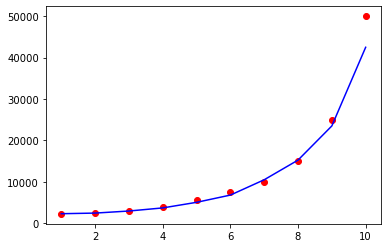

In [7]:
plt.scatter(x, y, color = "red")
plt.plot(x, y_pred, color = "blue")
plt.show()

## Predictions

Random Forest Regression modelinde kullanılan Decision Tree modellerinin ortalaması alındığı için veri setinde olmayan farklı değerler oluşturulabilir.

In [8]:
print(rf_reg.predict([[11]]))
print(rf_reg.predict([[6.6]]))

[42500.]
[10500.]


## Result Accuracy

In [9]:
from sklearn.metrics import r2_score

acc = r2_score(y, y_pred)
print(acc)

0.9704434230386582
